In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import re

import numpy as np
import pandas as pd

# TODAY!

## - Sequence Models

## - Neural Embeddings

## - (Large) Language Modeling

# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $

## We have learned about respecting the text input sequence

<div>
<img src="NN.png" width="600px"/>
</div>

## What are some examples of text classification?

# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $

- ### Topic modeling
- ### Spam detection
- ### Sentiment analysis

# $ \\ $
# $ \\ $
# $ \\ $

### Example Keras Nework:

#### sequence length == 5

```

word_input = Input()  
# shape (5,)

embedded_words = Embedding()(word_input)  
# shape (5, embed_dim)

hidden = MyAwesomeLayer()(embedded_words)
# shape (hidden_dim)

output = Dense(NUM_CLASSES, activation='softmax')(hidden)
# shape (2,)
```

# $ \\ $
# $ \\ $
# $ \\ $

## Sequence-level Output

<div>
<img src="NN2.png" width="600px"/>
</div>

## What are some examples?

# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $

- ### Extractive summarization
- ### Named Entity detection
- ### Speech recognition?

# $ \\ $
# $ \\ $
# $ \\ $

### Example Keras Nework:

#### sequence length == 5

```
word_input = Input()  
# shape (5,)

embedded_words = Embedding()(word_input)  
# shape (5, embed_dim)

hidden = MyAwesomeLayer()(embedded_words)
# shape (5, hidden_dim)

output = Dense(NUM_CLASSES, activation='softmax')(hidden)
# shape (5, NUM_CLASSES)
```

# $ \\ $
# $ \\ $
# $ \\ $

## For our network we can choose a Dense layer, a CNN, an RNN/LSTM.
## What should we do?

# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

### Let's choose RNNs and stack a few layers

<div>
<img src="RNN.png" width="500px"/>
</div>

# $ \\ $
# $ \\ $

### Example Keras Nework

#### sequence length == 5

```
word_input = Input()  
# shape (5,)

embedded_words = Embedding()(word_input)  
# shape (5, embed_dim)

hidden = LSTM(return_sequences=True)(embedded_words)
# shape (5, hidden_dim_1)

hidden = LSTM(return_sequences=True)(hidden)
# shape (5, hidden_dim_2)

output = Dense(NUM_CLASSES, activation='softmax')(hidden)
# shape (5, 2)
```

# $ \\ $
# $ \\ $

### We can add bi-directionality

<div>
<img src="RNN2.png" width="500px"/>
</div>

# $ \\ $
# $ \\ $

### Example Keras Nework

#### sequence length == 5

```
word_input = Input()  
# shape (5,)

embedded_words = Embedding()(word_input)  
# shape (5, embed_dim)

hidden = Bidirectional(LSTM(return_sequences=True))(embedded_words)
# shape (5, 2 x hidden_dim_1)

hidden = Bidirectional(LSTM(return_sequences=True))(hidden)
# shape (5, 2 x hidden_dim_2)

output = Dense(NUM_CLASSES, activation='softmax')(hidden)
# shape (5, 2)
```

In [3]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Bidirectional

Bidirectional?

Init signature:
Bidirectional(
    layer,
    merge_mode='concat',
    weights=None,
    backward_layer=None,
    **kwargs,
)
Docstring:     
Bidirectional wrapper for RNNs.

Args:
  layer: `keras.layers.RNN` instance, such as `keras.layers.LSTM` or
    `keras.layers.GRU`. It could also be a `keras.layers.Layer` instance
    that meets the following criteria:
    1. Be a sequence-processing layer (accepts 3D+ inputs).
    2. Have a `go_backwards`, `return_sequences` and `return_state`
      attribute (with the same semantics as for the `RNN` class).
    3. Have an `input_spec` attribute.
    4. Implement serialization via `get_config()` and `from_config()`.
    Note that the recommended way to create new RNN layers is to write a
    custom RNN cell and use it with `keras.layers.RNN`, instead of
    subclassing `keras.layers.Layer` directly.
    - When the `returns_sequences` is true, the output of the masked
    timestep will be zero regardless of the layer's original
    `zero_output_

# $ \\ $
# $ \\ $

## Example: Text Capitalization

### Task:

### Input: `yesterday, i went to whole foods.`

### Output: `Yesterday, I went to Whole Foods.`

## How do we frame this task?

# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

### Tokenize: `yesterday`, `,`, `i`, `went`, `to`, `whole`, `foods`, `.`

### Vocab Index: `#172`, `#3`, `#11`, `#42`, `#28`, `#920`, `#86`, `#2`

### Embed, Model, etc

### Output (needs cap): `1`, `0`, `1`, `0`, `0`, `1`, `1`, `0`
- #### `yesterday` - `1`
- #### `,` - `0`
- #### `i` - `1`
- #### `went` - `0`
- #### `to` - `0`
- #### `whole` - `1`
- #### `foods` - `1`
- #### `.` - `0`

# $ \\ $
# $ \\ $
# $ \\ $

## Let's write some code

In [4]:
wiki_df = pd.read_csv('../data/kdwd_r1k_articles.csv')
train_text = '\n'.join(wiki_df['intro_text'].iloc[:700])
val_text = '\n'.join(wiki_df['intro_text'].iloc[700:])

## How do we tokenize? is whitespace splitting a good idea?

# $ \\ $
# $ \\ $
# $ \\ $

## eg `r'[A-Za-z]+|[^\s]` to make sure we get every symbole like `.` individually

In [5]:
def tokenize(text):
    return re.findall(r'[A-Za-z]+|[^\s]', text)

In [6]:
train_tokens = tokenize(train_text)
val_tokens = tokenize(val_text)

## How do we deal with variable sequence length?

# $ \\ $
# $ \\ $
# $ \\ $

## Instead of padding (see homework), let's keep a moving fixed window of eg 10 words

In [7]:
chunk_len = 10

train_chunks = []
for n in range(len(train_tokens) // chunk_len):
    train_chunks.append(train_tokens[n * chunk_len: (n + 1) * chunk_len])
    
val_chunks = []
for n in range(len(val_tokens) // chunk_len):
    val_chunks.append(val_tokens[n * chunk_len: (n + 1) * chunk_len])

In [8]:
print(len(train_chunks), 'train chunks')
print(len(val_chunks), 'val chunks')

11701 train chunks
751 val chunks


In [9]:
train_chunks[0]

['Apple',
 'Inc',
 '.',
 'is',
 'an',
 'American',
 'multinational',
 'technology',
 'company',
 'headquartered']

## $ \\ $
## $ \\ $
## $ \\ $

### Make target: 0/1 indicators for "needs_capitalization"

In [10]:
# [('Apple', 1),
#  ('Inc', 1),
#  ('.', 0),
#  ('is', 0),
#  ('an', 0),
#  ('American', 1),
#  ('multinational', 0),
#  ('technology', 0),
#  ('company', 0),
#  ('headquartered', 0)]

In [11]:
train_chunks_target = []
for chunk in train_chunks:
    chunk_target = []
    for token in chunk:
        if token[0] != token[0].lower():
            chunk_target.append(1)
        else:
            chunk_target.append(0)
    train_chunks_target.append(chunk_target)
    
val_chunks_target = []
for chunk in val_chunks:
    chunk_target = []
    for token in chunk:
        if token[0] != token[0].lower():
            chunk_target.append(1)
        else:
            chunk_target.append(0)
    val_chunks_target.append(chunk_target)

In [12]:
list(zip(train_chunks[0], train_chunks_target[0]))

[('Apple', 1),
 ('Inc', 1),
 ('.', 0),
 ('is', 0),
 ('an', 0),
 ('American', 1),
 ('multinational', 0),
 ('technology', 0),
 ('company', 0),
 ('headquartered', 0)]

## $ \\ $
## $ \\ $
## $ \\ $

## Make vocabulary for input

In [13]:
token_vc = pd.Series(train_tokens).str.lower().value_counts()

In [14]:
token_vc.head()

,      8337
.      5617
the    4588
and    3930
0      3644
dtype: int64

In [15]:
token_vc.tail()

recommendations    1
mansueto           1
sr                 1
appleton           1
boutiques          1
dtype: int64

### Set cutoff for UNK to define fixed vocabulary

In [16]:
min_cutoff = 3
vocab_list = token_vc[token_vc >= min_cutoff].index.tolist()

In [17]:
print(len(vocab_list), 'tokens in vocabulary')

3270 tokens in vocabulary


## $ \\ $
## $ \\ $
## $ \\ $

## Make Input embeddings for vocabulary

<div>
<img src="InputEmb.png" width="350px"/>
</div>

### Let's reserve `len(vocab_list) + 1` for `<UNK>`

In [18]:
embed_dim = 50
embed_matrix = np.zeros((len(vocab_list) + 1, embed_dim))

## $ \\ $
## $ \\ $
## $ \\ $

## Create input index vectors as lookup for embed matrix

In [19]:
vocab_idx_lookup = {token: n for n, token in enumerate(vocab_list)}
idx_vocab_lookup = {n: token for n, token in enumerate(vocab_list)}

In [20]:
X_train = []
for chunk in train_chunks:
    X_train.append([vocab_idx_lookup.get(token.lower(), len(vocab_list)) for token in chunk])
X_train = np.array(X_train)

X_val = []
for chunk in val_chunks:
    X_val.append([vocab_idx_lookup.get(token.lower(), len(vocab_list)) for token in chunk])
X_val = np.array(X_val)

In [21]:
print(train_chunks[0])

['Apple', 'Inc', '.', 'is', 'an', 'American', 'multinational', 'technology', 'company', 'headquartered']


In [22]:
X_train[0]

array([263,  36,   1,  10,  32,  34, 107, 103,   9,  45])

## $ \\ $
## $ \\ $
## $ \\ $

## Create target vectors for 2 classes

In [23]:
from tensorflow.keras.utils import to_categorical

y_train = []
for chunk in train_chunks_target:
    y_train.append([to_categorical(n, num_classes=2) for n in chunk])
y_train = np.array(y_train)

y_val = []
for chunk in val_chunks_target:
    y_val.append([to_categorical(n, num_classes=2) for n in chunk])
y_val = np.array(y_val)

In [24]:
train_chunks_target[0]

[1, 1, 0, 0, 0, 1, 0, 0, 0, 0]

In [25]:
y_train[0]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## $ \\ $
## $ \\ $
## $ \\ $

## Build the Neural Network Model

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.initializers import Constant
import tensorflow.keras.backend as K

In [27]:
def get_model(embed_matrix):

    K.clear_session()

    word_input = Input(shape=(chunk_len,), dtype='int32')

    embedded_words = Embedding(
        embed_matrix.shape[0], 
        embed_matrix.shape[1],
        embeddings_initializer=Constant(embed_matrix),
        trainable=True,
        input_length=chunk_len
    )(word_input)

    hidden = Bidirectional(LSTM(
        16, 
        dropout=0.2,
        recurrent_dropout=0.2,
        return_sequences=True,
    ))(embedded_words)

    hidden = Dense(4, activation='elu')(hidden)
    output = Dense(2, activation='softmax')(hidden)

    model = Model(word_input, output)

    model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
    )
    
    return model

model = get_model(embed_matrix)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 50)            163550    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 32)           8576      
 l)                                                              
                                                                 
 dense (Dense)               (None, 10, 4)             132       
                                                                 
 dense_1 (Dense)             (None, 10, 2)             10        
                                                                 
Total params: 172,268
Trainable params: 172,268
Non-trainable params: 0
_______________________________________________________

## $ \\ $
## $ \\ $
## $ \\ $

## Fit the model

In [29]:
hist = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=10, 
    shuffle=True,
    batch_size=64
)

Epoch 1/10
183/183 [==============================] - 9s 17ms/step - loss: 0.4248 - accuracy: 0.8279 - val_loss: 0.2624 - val_accuracy: 0.8996
Epoch 2/10
183/183 [==============================] - 3s 14ms/step - loss: 0.2021 - accuracy: 0.9219 - val_loss: 0.1696 - val_accuracy: 0.9308
Epoch 3/10
183/183 [==============================] - 3s 14ms/step - loss: 0.1335 - accuracy: 0.9477 - val_loss: 0.1441 - val_accuracy: 0.9439
Epoch 4/10
183/183 [==============================] - 3s 14ms/step - loss: 0.1107 - accuracy: 0.9572 - val_loss: 0.1394 - val_accuracy: 0.9471
Epoch 5/10
183/183 [==============================] - 3s 14ms/step - loss: 0.0982 - accuracy: 0.9622 - val_loss: 0.1397 - val_accuracy: 0.9478
Epoch 6/10
183/183 [==============================] - 2s 13ms/step - loss: 0.0898 - accuracy: 0.9661 - val_loss: 0.1386 - val_accuracy: 0.9483
Epoch 7/10
183/183 [==============================] - 3s 15ms/step - loss: 0.0826 - accuracy: 0.9688 - val_loss: 0.1435 - val_accuracy: 0.9462

In [30]:
text = "apple inc. is a great company and also recently"

In [31]:
encoded_input = [vocab_idx_lookup.get(token, len(vocab_list)) for token in tokenize(text)[:10]]

In [32]:
output = model.predict(np.array(encoded_input).reshape(1, -1))[0, :,1]

1/1 [==============================] - 1s 569ms/step


In [33]:
threshold = 0.8
out_text = []
for cap_indicator, token in zip(output, tokenize(text)):
    if cap_indicator >= threshold:
        out_text.append(token.capitalize())
    else:
        out_text.append(token)
out_text

['Apple', 'Inc', '.', 'is', 'a', 'great', 'company', 'and', 'also', 'recently']

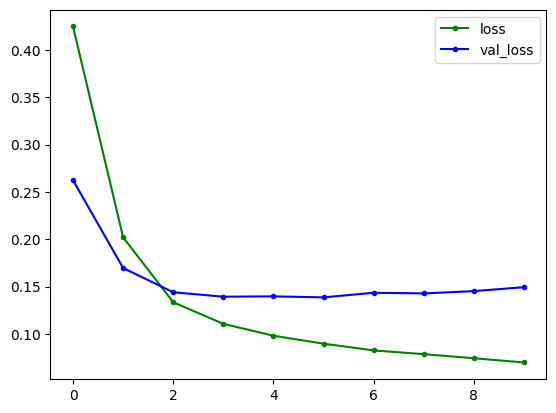

In [34]:
plt.plot(hist.history['loss'], '.-g', label='loss')
plt.plot(hist.history['val_loss'], '.-b', label='val_loss')
plt.legend();

### what can we tell from this graph?

## $ \\ $
## $ \\ $
## $ \\ $

## Regularize by using pretrained embeddings from somewhere else
- #### populate the word vectors that we know

<div>
<img src="PreTrainEmb.png" width="800px"/>
</div>

## $ \\ $
## $ \\ $
## $ \\ $

In [35]:
from gensim.models import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format('../data/glove.6B.50d.txt', binary=False, limit=None, no_header=True)


In [36]:
type(glove_model['apple'])

numpy.ndarray

In [37]:
new_embed_matrix = embed_matrix
for n, token in enumerate(vocab_list):
    if token in glove_model:
        new_embed_matrix[n] = glove_model[token]

In [38]:
model = get_model(new_embed_matrix)

In [39]:
hist2 = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=10, 
    shuffle=True,
    batch_size=64
)

Epoch 1/10
183/183 [==============================] - 9s 15ms/step - loss: 0.4060 - accuracy: 0.8261 - val_loss: 0.2626 - val_accuracy: 0.8967
Epoch 2/10
183/183 [==============================] - 2s 13ms/step - loss: 0.2168 - accuracy: 0.9182 - val_loss: 0.1683 - val_accuracy: 0.9358
Epoch 3/10
183/183 [==============================] - 2s 13ms/step - loss: 0.1524 - accuracy: 0.9430 - val_loss: 0.1475 - val_accuracy: 0.9425
Epoch 4/10
183/183 [==============================] - 3s 15ms/step - loss: 0.1291 - accuracy: 0.9511 - val_loss: 0.1415 - val_accuracy: 0.9455
Epoch 5/10
183/183 [==============================] - 3s 14ms/step - loss: 0.1161 - accuracy: 0.9555 - val_loss: 0.1341 - val_accuracy: 0.9485
Epoch 6/10
183/183 [==============================] - 3s 14ms/step - loss: 0.1068 - accuracy: 0.9590 - val_loss: 0.1318 - val_accuracy: 0.9483
Epoch 7/10
183/183 [==============================] - 3s 14ms/step - loss: 0.1003 - accuracy: 0.9617 - val_loss: 0.1303 - val_accuracy: 0.9489

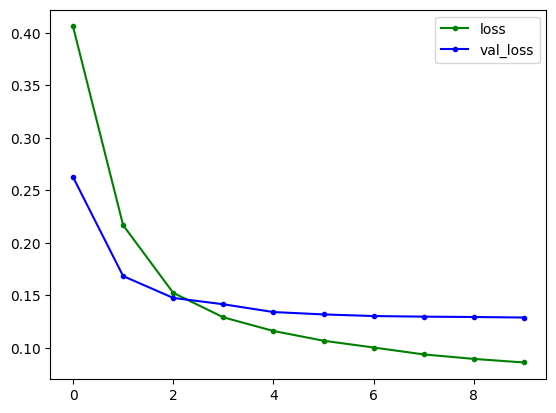

In [40]:
plt.plot(hist2.history['loss'], '.-g', label='loss')
plt.plot(hist2.history['val_loss'], '.-b', label='val_loss')
plt.legend();

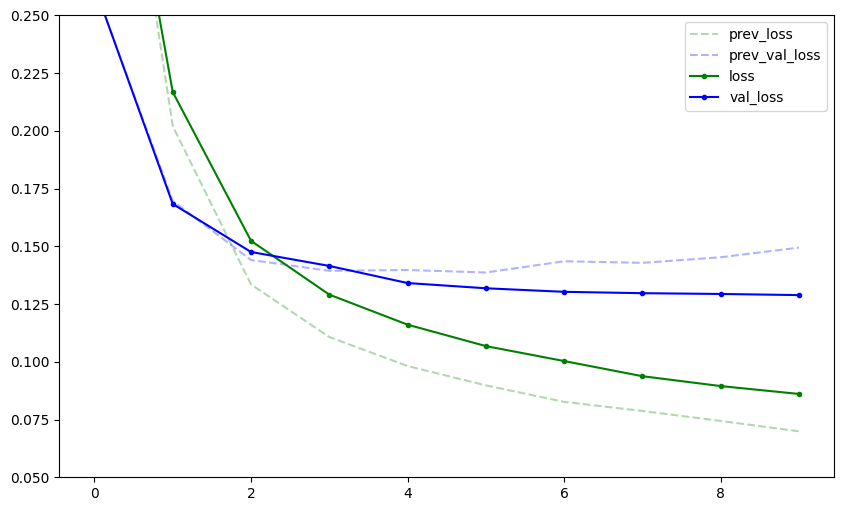

In [41]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], '--g', alpha=0.3, label='prev_loss')
plt.plot(hist.history['val_loss'], '--b', alpha=0.3, label='prev_val_loss')
plt.plot(hist2.history['loss'], '.-g', label='loss')
plt.plot(hist2.history['val_loss'], '.-b', label='val_loss')
plt.ylim([0.05, 0.25])
plt.legend();

# $ $
# $ $
# $ $
# $ $

## What are some ways in which we could improve this model?

# $ $
# $ $
# $ $
# $ $

- ### use every word as a start

<div>
<img src="SlidingWindow.png" width="500px"/>
</div>

```
chunk_len = 10

train_chunks = []
for n in range(len(train_tokens) // chunk_len):
    train_chunks.append(train_tokens[n * chunk_len: (n + 1) * chunk_len])
```

vs

```
chunk_len = 10

train_chunks = []
for n in range(len(train_tokens) - chunk_len):
    train_chunks.append(train_tokens[n: n + chunk_len])
```

# $ $
# $ $
# $ $
# $ $

- ### add padding for varying input length
- ### model structure improvements
- ### more data (!we can get this from anywhere!)

# $ $
# $ $
# $ $
# $ $

## ! Note: Actually we have learned a lot of knowledge in this task (see LLMs) !

# $ $
# $ $
# $ $
# $ $

## Can the output for each word in a sequence tagging experiment be multi-class?

# $ $
# $ $
# $ $
# $ $

# $ $
# $ $
# $ $
# $ $

## Example: Named Entity Recognition - NER

### Task to 'tag' words  in a sentence with one of the categories:
- #### `Person` (PER)
- #### `Organization` (ORG)
- #### `Location` (LOC)
- #### ...

### # Janet is a terrific cardiologist who shops at Whole Foods. 

### ->

### # `Janet`$_{PER}$ is a terrific cardiologist who shops at `Whole Foods`$_{ORG}$. 

# $ $
# $ $
# $ $
# $ $

## We will look at this example in the homework.

# $ \\ $
# $ \\ $
# $ \\ $

# Embeddings & Language modeling II

- ### 1) Neural word embeddings (word2vec)
- ### 2) Contextual embeddings via language models (Elmo, Bert)
- ### 3) Modern (Large) Language models

# $ \\ $
# $ \\ $
# $ \\ $

## We know how to use a supervised task to create word embeddings
- ### eg: spam classification or NER

<div>
<img src="NN3.png" width="600px"/>
</div>

# $ \\ $
# $ \\ $

## We know how to use an unsupervised task to create a language model
- ### eg: 3-gram model

<div>
<img src="Wikipedia.png" width="600px"/>
</div>

# $ \\ $
# $ \\ $

## Can we combine these?
- ### create a neural network with a language model objective
- ### extract embeddings from that network

#### aka: turn the learning of embeddings into a supervised problem

# $ \\ $
# $ \\ $

## Let's define a simple task and network to do this  <small>(Continous bag of words: CBOW)</small>

<div>
<img src="CBOW.png" width="600px"/>
</div>

# $ \\ $
# $ \\ $

### What does the network look like?

<div>
<img src="CBOWModel.png" width="600px"/>
</div>

# $ \\ $
# $ \\ $

## Where do we find the embedding matrix?
### matrix of shape (vocab_size, embed_dim)

<div>
<img src="CBOWEmbedding.png" width="1000px"/>
</div>

# $ \\ $
# $ \\ $

### Example Keras Nework

```
word_input = Input()  
# shape (4,)

embedded_words = Embedding(trainable=True)(word_input)  
# shape (4, embed_dim)

avg_embedding = MyAverage()(embedded_words)
# shape (embed_dim,)

output = Dense(vocab_size, activation='softmax')(avg_embedding)
# shape (vocab_size,)
```

# $ \\ $
# $ \\ $

## One of the first popular algorithms for this was Word2Vec (Google)
## Let's use an implementation of this from `gensim`

In [42]:
wiki_df = pd.read_csv("../data/kdwd_r1k_articles.csv")

In [43]:
corpus = [re.findall(r'[a-z]+', text.lower()) for text in wiki_df['intro_text'].values]

In [44]:
from gensim.models import Word2Vec

model = Word2Vec(corpus, min_count=3, vector_size=50, epochs=100)

### we get embeddings, just like we are used to

cosine sim 0.61665565


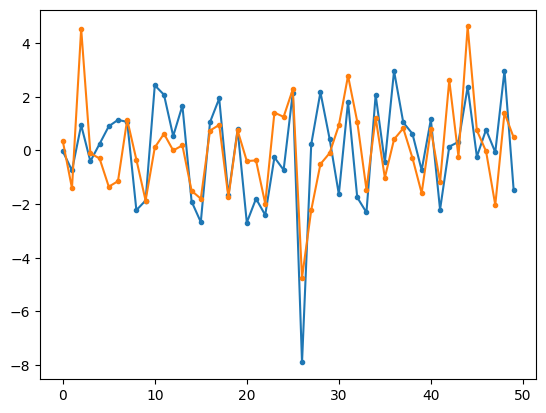

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

w1 = "apple"
w2 = "computers"

print('cosine sim',cosine_similarity([model.wv[w1]], [model.wv[w2]])[0][0])
plt.plot(model.wv['apple'], '.-')
plt.plot(model.wv['computers'], '.-')

cosine sim 0.060181424


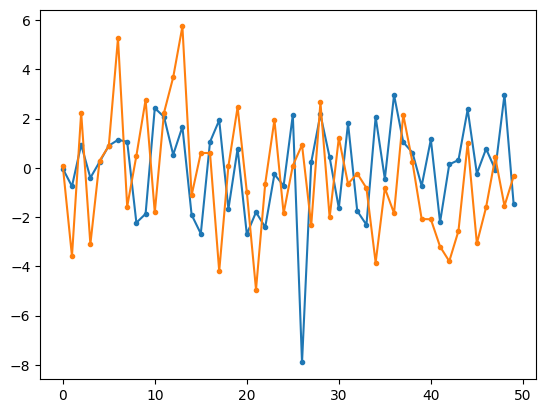

In [46]:
w1 = "apple"
w2 = "oil"

print('cosine sim',cosine_similarity([model.wv[w1]], [model.wv[w2]])[0][0])
plt.plot(model.wv[w1], '.-')
plt.plot(model.wv[w2], '.-')

### fast, cosine distance lookup

In [47]:
model.wv.most_similar('apple')

[('google', 0.6390557289123535),
 ('computers', 0.6166556477546692),
 ('microsoft', 0.6145262122154236),
 ('tablet', 0.6115058064460754),
 ('fellow', 0.6016826629638672),
 ('jobs', 0.5665212273597717),
 ('samsung', 0.5523134469985962),
 ('status', 0.5425548553466797),
 ('wozniak', 0.5419477224349976),
 ('target', 0.5242987275123596)]

# $ \\ $
# $ \\ $

### but we now have an actual NN model just like any other

In [48]:
from gensim.models.callbacks import CallbackAny2Vec

class my_callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

_ = Word2Vec(corpus, epochs=10, compute_loss=True, callbacks=[my_callback()])

Loss after epoch 0: 88123.7265625
Loss after epoch 1: 52435.6953125
Loss after epoch 2: 50344.546875
Loss after epoch 3: 48426.609375
Loss after epoch 4: 47022.421875
Loss after epoch 5: 46494.125
Loss after epoch 6: 45916.1875
Loss after epoch 7: 60461.21875
Loss after epoch 8: 44589.9375
Loss after epoch 9: 44361.15625


### we can monitor convergence, loss, val performance, etc

# $ \\ $
# $ \\ $

### Let's look under the hood into the main weights matrix (Embedding layer)

<div>
<img src="EmbeddingLayer.png" width="800px"/>
</div>


In [49]:
weights_matix = model.wv.vectors
weights_matix.shape

(3372, 50)

In [50]:
model.wv.key_to_index['apple']

257

### let `v` be the OHE vector for `'apple'`

In [51]:
v = np.zeros((len(model.wv.key_to_index)))
v[model.wv.key_to_index['apple']] = 1

### test if `model.wv['apple'] == np.dot(weights_matix.T, v)`

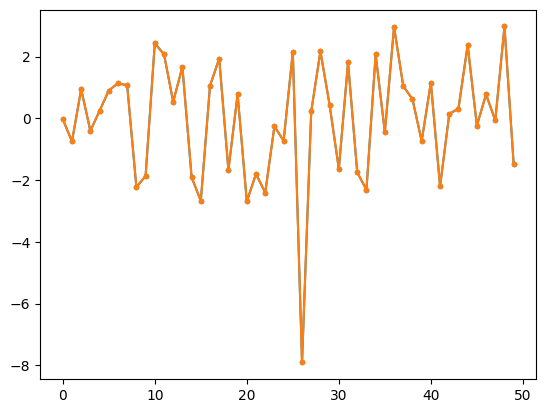

In [52]:
plt.plot(model.wv['apple'], '.-')
plt.plot(np.dot(weights_matix.T, v), '.-')

<div>
<img src="CBOWEmbedding.png" width="1000px"/>
</div>

# $ \\ $
# $ \\ $

### Let's look into predicting `'microsoft'` given the context `'windows', 'tablet', 'pc'`

In [53]:
model.wv.most_similar(['windows', 'tablet', 'pc'])

[('microsoft', 0.7077733278274536),
 ('computers', 0.6575942039489746),
 ('dominant', 0.6209782361984253),
 ('surface', 0.5999319553375244),
 ('code', 0.5991560816764832),
 ('smartphones', 0.5937674641609192),
 ('runs', 0.5896422266960144),
 ('shield', 0.5863073468208313),
 ('disk', 0.5824577808380127),
 ('innovations', 0.5714677572250366)]

### makes sense that the embedding of these words is closes to microsoft.

### But what about the final network ouput?

# $ \\ $
# $ \\ $

In [54]:
v = np.zeros((len(model.wv.key_to_index)))
v[model.wv.key_to_index['windows']] = 1
v[model.wv.key_to_index['tablet']] = 1
v[model.wv.key_to_index['pc']] = 1

In [55]:
from scipy.special import softmax

In [56]:
hidden_state = np.dot(weights_matix.T, v)
output = np.dot(hidden_state, weights_matix.T)
softmax_output = softmax(output)

In [57]:
s = pd.Series(softmax_output).sort_values(ascending=False)
s.index = [model.wv.index_to_key[idx] for idx in s.index]
s.head(10)

microsoft    1.000000e+00
computers    2.474366e-09
apple        2.562311e-16
computer     6.064583e-17
system       6.935894e-19
computing    2.890191e-21
personal     1.581664e-21
windows      1.226111e-21
cloud        4.210547e-22
mobile       7.549908e-24
dtype: float64

## How are these different?

# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $

## We have now learned ways of producing embedding matrices in many ways, including from NNs, allowing us to use those matrices in other downstream tasks

<div>
<img src="PreTrainEmb2.png" width="900px"/>
</div>

# $ \\ $
# $ \\ $

## What are we missing here for the represenation of words?

# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

## Embeddings up until now are a 'static' lookup for each word. They can get finetuned, but still one per word.

## But we know that this is not true (ambiguity):

<div>
<img src="ambiguity.png" width="400px"/>
</div>

## So what are we missing in our embeddings?

# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

### the meaning of the word depends on the context that it is being used in:

- #### I found a wooden `stick` in the forest
- #### chewing gum can `stick` to my shoe

### the word represenation (vector) should be different in each scenario

# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

## enter.... Sesame Street

<div>
<img src="SesameStreet.png" width="600px"/>
</div>

# $ \\ $
# $ \\ $

## ELMO (Embeddings from Language Models)

### word vectors are learned functions of the internal states of a deep bidirectional language mode

#### - https://arxiv.org/pdf/1802.05365.pdf

<div>
<img src="ELMO.png" width="600px"/>
</div>

### seen as a black box, this model will turn a list of words into vectors that depend on other words

## How is this achieved?

# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $

## Build a language model using an LSTM ontop of an Embedding layer

### Language model optimize the probability of the next word given its past:
- ### $P(w_k|w_{k-1}w_{k-2}...w_{2}w_{1})$

<div>
<img src="ELMO2.png" width="600px"/>
</div>

- ### each LSTM layer contains information from the previous words as well as the word itself

## Is this left to right formulation limiting us?

# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $

## Build a second language model 'reading' in reverse

### Then jointly optimize the probabilities of Forward and backward language model.
- ### $P(w_k|w_{k-1}w_{k-2}...w_{2}w_{1})$
- ### $P(w_k|w_{k+1}w_{k+2}...w_{N-1}w_{N})$

<div>
<img src="ELMO3.png" width="1000px"/>
</div>

- ### each layer can be viewed as a contextual representation of the current word including information from its past

# $ \\ $
# $ \\ $

## How do we get a word embedding for eg `'stick'`?

<div>
<img src="ELMO4.png" width="900px"/>
</div>

### Contextual word embedding as weighed sum over layer representations

# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $

## Use pre-trained ELMO model as a base representation for your input text

<div>
<img src="ELMO5.png" width="700px"/>
</div>

# $ \\ $
# $ \\ $

### Note that you now need an entire network rather than just a matrix

## A good way to evaluate models like elmo is 'downstream' evaluation

<div>
<img src="SOTAResults.png" width="600px"/>
</div>

# $ \\ $
# $ \\ $

## Note: such pretrained Language Models / Embeddings will often exist in many sizes

<div>
<img src="Encoder1.png" width="500px"/>
</div>

### Trade off speed vs accuracy

<div>
<img src="Encoder2.png" width="500px"/>
</div>

## This makes neural LM a very powerful and remarkable easy way to distribute pre-trained networks for further use in downstream tasks

# $ \\ $
# $ \\ $

## BUT, RNNs are slow and hard to scale
## Furthermore, attention is a powerful concept:

# $ \\ $
# $ \\ $

### Attention in nlp (translation)

<div>
<img src="Attention1.png" width="60%"/>
</div>

# $ \\ $
# $ \\ $

<div>
<img src="Attention2.png" width="55%"/>
</div>

# $ \\ $
# $ \\ $

<div>
<img src="Attention3.png" width="55%"/>
</div>

# $ \\ $
# $ \\ $

### Attention activation map

<div>
<img src="AttentionActivation.png" width="55%"/>
</div>

# $ \\ $
# $ \\ $

## Transformer - a powerful NN building block

- ### fast parallelizable attention mechanism (vs RNN)

- #### ref: http://jalammar.github.io/illustrated-transformer/

<div>
<img src="TransformerIllustrated.png" width="1000px"/>
</div>

# $ \\ $
# $ \\ $

## First (Large) LM model was `BERT`

# $ \\ $
# $ \\ $

## BERT

### Bidirectional Encoder Representations from Transformers

#### https://arxiv.org/pdf/1810.04805.pdf

<div>
<img src="BERT.png" width="500px"/>
</div>

# $ \\ $
# $ \\ $

## General Idea of Bert

## <center> Step 1:</center>

<div>
<img src="BERT2.png" width="500px"/>
</div>

## <center> Step 2:</center>

<div>
<img src="BERT3.png" width="500px"/>
</div>

# $ \\ $
# $ \\ $

## How is Bert trained?

## Masking k% of words

- ### the man went to the `[MASK]` to buy a `[MASK]` of milk
### -> predict `store` and `gallon`

### Question, how is this different from GPT's next word prediction?

# $ \\ $
# $ \\ $

In [58]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

#### note: word piece tokenizer was used

In [59]:
tokenizer.tokenize('unfriendly')

['un', '##fr', '##ien', '##dly']

### Encode the input text for model consumption

In [60]:
text = "Replace me by any text you'd like."

In [61]:
encoded_input = tokenizer(text, return_tensors='pt')

In [62]:
encoded_input

{'input_ids': tensor([[ 101, 5672, 2033, 2011, 2151, 3793, 2017, 1005, 1040, 2066, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [63]:
output = model(**encoded_input)


In [64]:
output.last_hidden_state.shape

torch.Size([1, 12, 768])

### very easy to get powerful contextual representations for our input sentence

# $ \\ $
# $ \\ $

## Let's test this:
### Choose two different interpretations of `'stick'`

In [65]:
text = "I found a wooden stick in the forest"
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
vec_1 = output.last_hidden_state[0,4,:].detach().numpy()

text = "chewing gum can stick to my shoe"
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
vec_2 = output.last_hidden_state[0,3,:].detach().numpy()

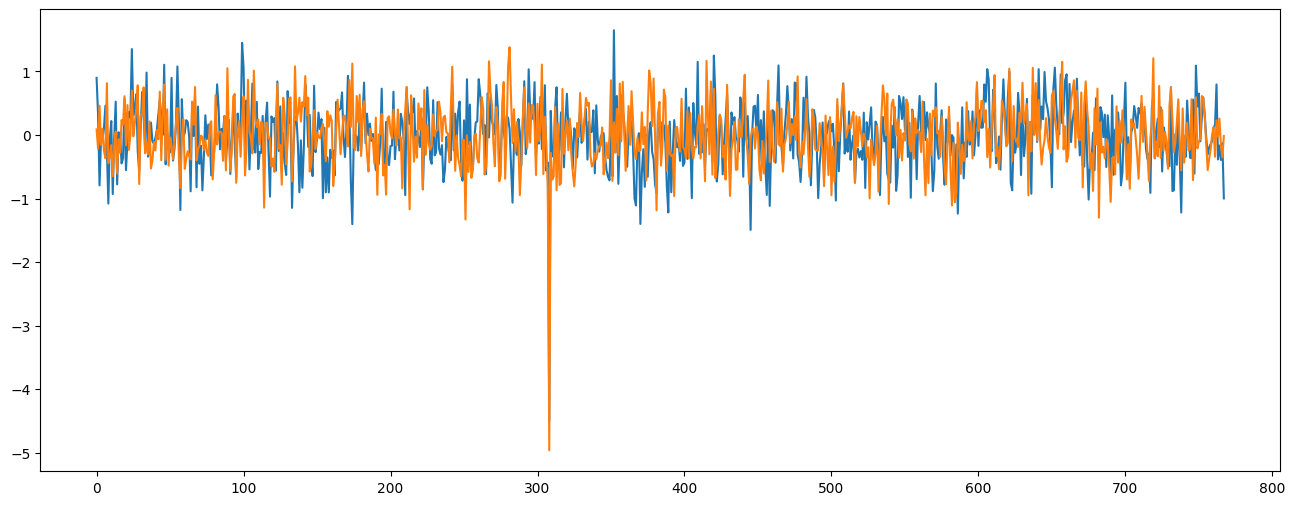

In [66]:
plt.figure(figsize=(16,6))
plt.plot(vec_1)
plt.plot(vec_2);

In [67]:
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
print('cosine sim:', cosine_similarity([vec_1], [vec_2])[0][0])

cosine sim: 0.36625832


### Let's choose a sentence where the meaning of stick is more similar

In [69]:
text = "My garden has a wooden stick on the ground"
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
vec_3 = output.last_hidden_state[0,5,:].detach().numpy()

In [70]:
print('cosine sim:', cosine_similarity([vec_1], [vec_3])[0][0])

cosine sim: 0.876843


# $ \\ $
# $ \\ $

## We can also look at the original masked training task

In [71]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'c

In [72]:
unmasker("The cat ate most of the [MASK].")

[{'score': 0.1800980418920517,
  'token': 2833,
  'token_str': 'food',
  'sequence': 'the cat ate most of the food.'},
 {'score': 0.09574179351329803,
  'token': 6240,
  'token_str': 'meat',
  'sequence': 'the cat ate most of the meat.'},
 {'score': 0.04698106646537781,
  'token': 5909,
  'token_str': 'fruit',
  'sequence': 'the cat ate most of the fruit.'},
 {'score': 0.024772504344582558,
  'token': 7852,
  'token_str': 'bread',
  'sequence': 'the cat ate most of the bread.'},
 {'score': 0.021497944369912148,
  'token': 7954,
  'token_str': 'meal',
  'sequence': 'the cat ate most of the meal.'}]

# $ \\ $
# $ \\ $

## Improvements to BERT (ImageNet moment)

<div>
<img src="BERT4.png" width="400px"/>
</div>

#### <center>and many more...</center>

# $ \\ $
# $ \\ $

<div>
<img src="BERT5.png" width="600px"/>
</div>

# $ \\ $
# $ \\ $

<div>
<img src="BERT6.png" width="700px"/>
</div>

## Note that these models incorporate a lot of general knowledge.

# $ \\ $
# $ \\ $

## some references
- #### ref: https://ruder.io/word-embeddings-1/index.html#skipgram
- #### ref w2v: http://jalammar.github.io/illustrated-word2vec/
- #### ref http://jalammar.github.io/illustrated-bert/

# $ \\ $
# $ \\ $

## Modern networks

- #### Convolutions (up/down sampling, fast, length extrapolation images, audio)
- #### Lstm (simple sequences, leightweight decoders)
- #### Activations, Norm Layers, Dropout, etc
- #### Transformers (most powerful, slow, positional dependence)

# $ \\ $
# $ \\ $

### Network Architectures

<div>
<img src="NetworkArchitecture.png" width="500px"/>
</div>

# $ \\ $
# $ \\ $

### High level model structure

<div>
<img src="HighLevelModelStructure.png" width="500px"/>
</div>

#### Finetuning Large Networks:
- #### separate encoder/decoder networks
- #### replacing model head (using embeddings)
- #### freezing of parts/layers for finetuning

# $ \\ $
# $ \\ $

### GPT-4 (Decoder-only model)

<div>
<img src="GPT4.png" width="500px"/>
</div>

# $ \\ $

# $ \\ $
# $ \\ $

### Llama: Meta's Open Source GPT

https://www.llama.com/llama-downloads/

<div>
<img src="Llama3dot2.jpg" width="100%"/>
</div>